In [1]:
pip install -q mediapipe==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install protobuf==3.20.*

Note: you may need to restart the kernel to use updated packages.


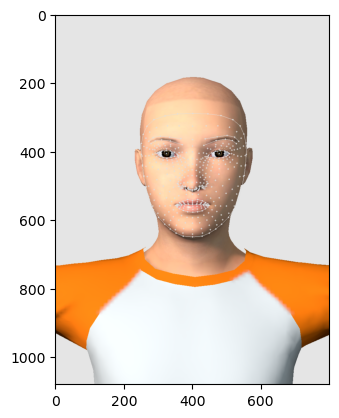

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# 얼굴 검출을 위한 객체
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    refine_landmarks=True,
    static_image_mode=True,
    max_num_faces=3,
)
# Face Mesh를 그리기 위한 객체
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# 이미지 읽기
image = cv2.imread("./dataset/train/img/0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 얼굴 검출
results = face_mesh.process(image)

# Face Mesh 그리기
for single_face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=single_face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec,
    )

plt.imshow(image)
plt.show()

In [3]:
import numpy as np
import pandas as pd

In [4]:
for i in range(100):
    # 이미지 읽기
    image = cv2.imread("./dataset/train/img/%s.png"%i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 얼굴 검출
    results = face_mesh.process(image)

    # Face Mesh 그리기
    for single_face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=single_face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec,
        )
        
    globals()['face_mesh'+str(i)] = np.zeros((468,3))
    
    for simgle_face_landmarks in results.multi_face_landmarks:
        for j in range(468):
            coordinates = simgle_face_landmarks.landmark[j]
            globals()['face_mesh'+str(i)][j][0] = coordinates.x
            globals()['face_mesh'+str(i)][j][1] = coordinates.y
            globals()['face_mesh'+str(i)][j][2] = coordinates.z

    globals()['face_mesh'+str(i)] = pd.DataFrame(globals()['face_mesh'+str(i)])

In [65]:
for i in range(100):
    globals()['face_mesh'+str(i)].to_csv('./face_mesh2/%s.csv'%i,index=False)

In [6]:
face_mesh0

,0,1,2
0,0.502371,0.504171,-0.037935
1,0.500679,0.468458,-0.087712
2,0.501166,0.478283,-0.041098
3,0.487045,0.422387,-0.071804
4,0.500629,0.455174,-0.095515
...,...,...,...
463,0.548541,0.386046,-0.001325
464,0.538927,0.389200,-0.010916
465,0.533020,0.391800,-0.022067
466,0.633522,0.375214,0.006119


In [7]:
face_mesh12

,0,1,2
0,0.502248,0.503411,-0.038402
1,0.503271,0.466943,-0.084775
2,0.503623,0.477785,-0.040884
3,0.489556,0.425379,-0.068601
4,0.503141,0.454431,-0.091860
...,...,...,...
463,0.542939,0.393557,0.000042
464,0.534724,0.396361,-0.009127
465,0.529450,0.398620,-0.019908
466,0.623500,0.385477,0.007986
